In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

In [95]:
#db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
#db_file = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'
db_file = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_19.79/db_saltproc.h5'

step = 3.0 # days

db = tb.open_file(db_file, mode='r')
# print(db)

sim_param = db.root.simulation_parameters
# Keff at t=0 depletion step
k_bds = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
k_bds_err = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
# Keff at t=end depletion step
k_eds = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
k_eds_err = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])

db.close()

days = step*np.arange(len(k_bds))
days2 = np.linspace(step, (len(k_eds))*(step), num=len(k_eds), endpoint=True)

In [96]:
db_file_5leu = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'

db_5leu = tb.open_file(db_file_5leu, mode='r')

sim_param_5leu = db_5leu.root.simulation_parameters
# Keff at t=0 depletion step
k_bds_5 = np.array([x['keff_bds'][0] for x in sim_param_5leu.iterrows()])
k_bds_err_5 = np.array([x['keff_bds'][1] for x in sim_param_5leu.iterrows()])
# Keff at t=end depletion step
k_eds_5 = np.array([x['keff_eds'][0] for x in sim_param_5leu.iterrows()])
k_eds_err_5 = np.array([x['keff_eds'][1] for x in sim_param_5leu.iterrows()])

db_5leu.close()

days_5 = step*np.arange(len(k_bds_5))
days2_5 = np.linspace(step, (len(k_eds_5))*(step), num=len(k_eds_5), endpoint=True)

<IPython.core.display.Javascript object>


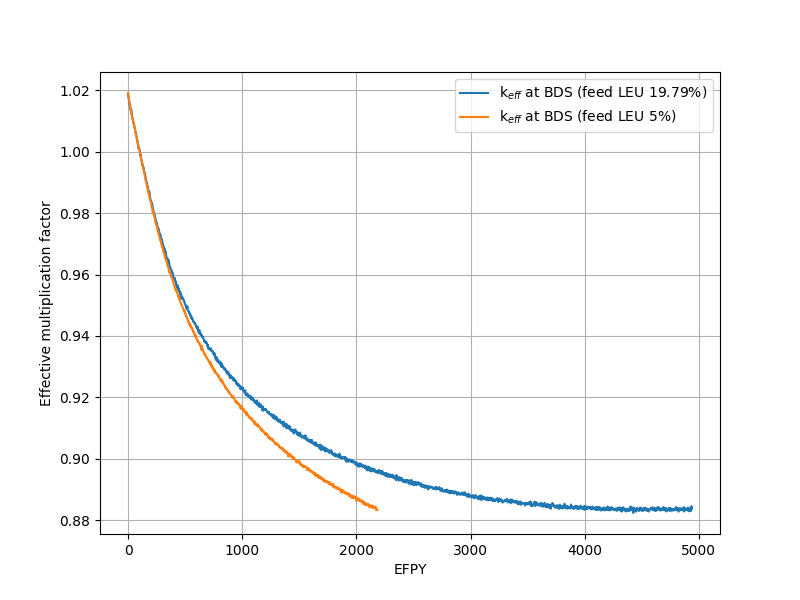

Keff drop over period 0.138567


In [97]:
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
ax.plot(days, k_bds, '-', label='k$_{eff}$ at BDS (feed LEU 19.79%)', linewidth=1.5)
ax.plot(days_5, k_bds_5, '-', label='k$_{eff}$ at BDS (feed LEU 5%)', linewidth=1.5)
#ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

#ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([1.0, 1.019])
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
print("Keff drop over period %f" %(k_bds[0]-k_eds[-1]))

<IPython.core.display.Javascript object>


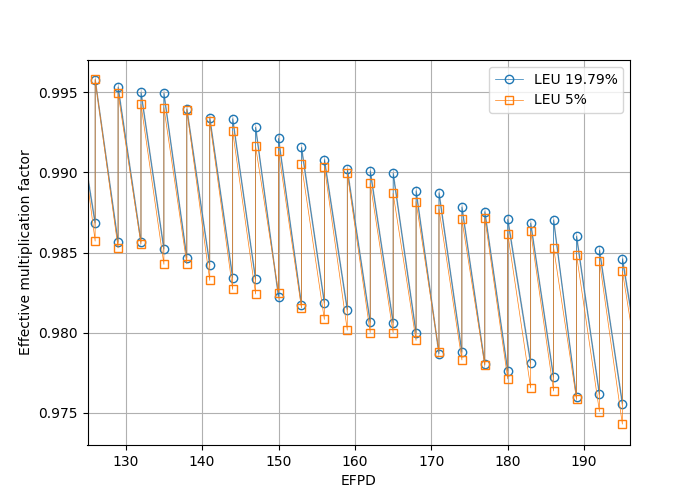

1647
1647
4938.0 4941.0


In [120]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

keff_5 = merge(k_bds_5, k_eds_5)
efpd_5 = merge(days_5, days2_5)
err_5 = merge(k_bds_err_5, k_eds_err_5)


# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, 'o-', label='LEU 19.79%', linewidth=0.5, markerfacecolor="None")
ax.plot(efpd_5, keff_5, 's-', label='LEU 5%', linewidth=0.5, markerfacecolor="None")

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.875, 1.02])
ax.set_xlim(125, 196.0)
ax.set_ylim(0.973, 0.997)

fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_zoomed.png',bbox_inches='tight', dpi=700)
print(len(k_bds))
print(len(k_eds))
print(days[-1], days2[-1])